# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [148]:
# your code here
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
import random
%matplotlib inline

In [28]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']
categories

['Food',
 'Travel',
 'Fashion',
 'Fitness',
 'Music',
 'Culture',
 'Family',
 'Health']

In [125]:
def random_dates(start, end, n):
     
    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

In [132]:
data = {'Date': random_dates(pd.to_datetime('2020-01-01'), pd.to_datetime('2023-01-01'), 500), 'Category': [random.choice(categories) for _ in range(500)], 'Likes': np.random.randint(0,10000, size=500)}

In [133]:
dframe = pd.DataFrame.from_dict(data)

In [134]:
dframe.head()

,Date,Category,Likes
0,2020-07-19 10:05:35,Music,6675
1,2022-03-31 10:22:03,Music,313
2,2022-08-28 12:54:07,Food,5442
3,2022-05-15 15:26:06,Food,8115
4,2020-09-02 07:07:19,Music,1804


In [135]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB


In [136]:
dframe.describe()

,Likes
count,500.000000
mean,4887.858000
std,2898.769952
min,75.000000
25%,2458.000000
50%,4688.500000
75%,7499.500000
max,9994.000000


In [137]:
dframe['Category'].value_counts()

Travel     78
Fitness    71
Music      67
Fashion    63
Family     62
Food       61
Health     53
Culture    45
Name: Category, dtype: int64

In [138]:
dframe.dropna(inplace = True)

In [139]:
print(dframe.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool


In [140]:
dframe.drop_duplicates(inplace=True)

In [141]:
dframe.dtypes

Date        datetime64[ns]
Category            object
Likes                int64
dtype: object

In [142]:
pd.to_datetime(dframe['Date'])

0     2020-07-19 10:05:35
1     2022-03-31 10:22:03
2     2022-08-28 12:54:07
3     2022-05-15 15:26:06
4     2020-09-02 07:07:19
              ...        
495   2022-05-23 11:09:33
496   2020-02-16 07:13:33
497   2020-04-27 15:40:58
498   2020-11-19 19:32:11
499   2020-02-25 15:26:59
Name: Date, Length: 500, dtype: datetime64[ns]

Text(0.5, 1.0, 'Distribution of Likes in Tweets')

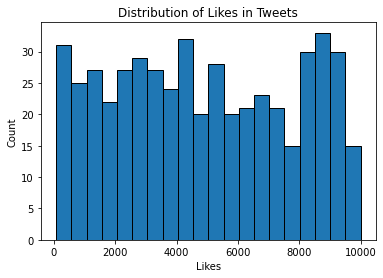

In [161]:
plt.pyplot.hist(dframe['Likes'],bins = 20, edgecolor='black')
plt.pyplot.xlabel("Likes")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Distribution of Likes in Tweets")

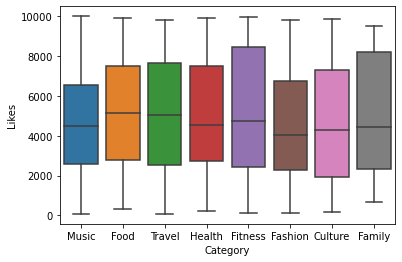

In [162]:
sns.boxplot(x='Category', y='Likes', data = dframe)

In [163]:
dframe['Likes'].mean()

4887.858

In [164]:
dframe.groupby(['Category']).mean()

,Likes
Category,
Culture,4734.866667
Family,4923.016129
Fashion,4462.619048
Fitness,5266.732394
Food,5032.540984
Health,5103.320755
Music,4611.119403
Travel,4924.923077
